In [4]:
2**6

64

In [5]:
# ??sysX.adv
# ??KBs.CA_sys
import KBs
??KBs.guess

In [1]:
import pickle
import numpy as np
with open('tp','rb') as f:  # Python 3: open(..., 'rb')
   hdist,tst_data = pickle.load(f)

In [2]:
from pymisca.util import *
from pymisca.vis_util import *
import KBs
kb = KBs.kb_2dntca()
r = "184af6a375706e604132428008"
kb.rulestr2alias(r)
# ??kb.rulestr2adv(r)

# i = 4
i = 0  ## life1
i = 5  ## life2
i = 8  ## unwanted
# i = 10 ## replicator
# i = 12
# i = 14
i = 15
# i = 1
sysX = KBs.CA_sys('2dntca',tst_data[i][1],(200,2**7,400))
# entF = make_entF(7)
# sysX.adv 
sysX.rulestr2alias()
# sysX.adv = sysX.family.randadv()
# sysX = KBs.CA_sys('2dtca',tst_data[0][0],(60,64,400))
# sysX.alias2rulestr()
sysX.alias
import IPython.display as ipd


is in ipython: 1
[WARN] pymisca.vis_util cannot find network


In [3]:
import scipy.spatial.distance as spdist
def test2(**kwargs):
    sysX = guess(**kwargs)
    hist = sample(sysX)
    hist = hist.reshape(hist.shape[:2]+(-1,))
    d = spdist.pdist(hist[-1],'hamming')
    d = 1 - abs(2*d-1)
    D = spdist.squareform(d)
    np.fill_diagonal(D,2)
    d = spdist.pdist(hist[len(hist)//2],'hamming')
    d = 1 - abs(2*d-1)
    D1= spdist.squareform(d)
    # plt.imshow(D[:50,:50])
#     plt.hist(D.ravel())
#     plt.hist(d.ravel(),bins=np.linspace(0,1,20))
    MIN = D.min(axis=0)
    MED = np.median(D,axis=0)
    MEAN = np.mean(D,axis=0)
    BINS=np.linspace(0,1,30)
    np.fill_diagonal(D,0)

#     plt.hist(MIN,bins=np.linspace(0,1,20))
#     plt.plot(MIN,MED,'x')

#     plt.hist2d(STD,MED,bins=BINS,norm=None
#     plt.hist2d(MIN,MED,bins=BINS,norm=None
#               )
#     plt.hist2d(D1.ravel(),D.ravel(),bins=BINS,norm=None
#               )
    np.fill_diagonal(D1,2)
    MIN1 = D1.min(axis=0)
    MEDS = [np.median(MIN1),np.median(MIN)]
    plt.hist2d(MIN1,MIN,bins=BINS,norm=None,normed=1
              )
    plt.plot([0,1],[0,1],'r--')
    data = np.vstack([MIN1,MIN]).T
#     res = gaussfit(data)
#     plt.plot(*(res.means_.ravel().tolist()+['rx']))
    plt.plot(*(MEDS+['wx']))
#     COV = res.covariances_[0]
    COV = np.cov(data.T)
    COR = cov2cor(COV)
#     logp = res.score_samples(data)
    plt.title('%.2f %.3f %.3f'%(
#         res.bic(data),
        abs(np.diff(MEDS)),
        COR[0,1],
#         np.std(logp)/np.mean(logp),
        np.trace(COV),
#                            np.prod(np.diag(np.sqrt(COV) ))
                          ) )
    plt.xticks([], [])
#                mpl.colors.LogNorm()
#     plt.hist2d(MEAN,MED,bins=BINS)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()
    return D

    return {'rule':{'family':sysX.family,'rulestr':sysX.rulestr},
            'med':np.ravel(MEDS).tolist(),'cov':COV.ravel().tolist(),'cor':COR[0,1]}
#     plt.show()
    

In [4]:
import scipy.spatial.distance as spdist
def guess(i=None,sysX=None,dct=None):
    dimsiz = (256,2**7,24**2)
    if i is not None:
        rstr = tst_data[i][1]
        familyname='2dntca'
    if dct is not None:
        familyname = dct['family']
        rstr = dct['rulestr']
    if sysX is None:
        sysX = KBs.CA_sys(familyname,rstr,dimsiz)
        # sysX = KBs.CA_sys('2dntca',tst_data[i][1],(200,2**7,400))
        sysX.rulestr2alias()
    else:
        sysX.dimsiz = dimsiz
        sysX.change_size()# spspa.distance
    return sysX
def worker0323(dct):
    sysX = guess(dct=dct)
    hist = sample(sysX)
    hist = hist.reshape(hist.shape[:2]+(-1,))

    d = spdist.pdist(hist[-1],'hamming')
    d = 1 - abs(2*d-1)
    D = spdist.squareform(d)
    np.fill_diagonal(D,2)
    
    d = spdist.pdist(hist[len(hist)//2],'hamming')
    d = 1 - abs(2*d-1)
    D1= spdist.squareform(d)
    np.fill_diagonal(D1,2)
    
    MIN = D.min(axis=0)
    MIN1 = D1.min(axis=0)
    data = np.vstack([MIN1,MIN]).T

    MEDS = [np.median(MIN1),np.median(MIN)]
    COV = np.cov(data.T)
    COR = cov2cor(COV)
    return {'rule':{'family':sysX.familyname,'rulestr':sysX.rulestr},
            'data':{ 'med':[x.tolist() for x in MEDS],'cov':COV.ravel().tolist(),'cor':[COR[0,1]]},
           }

kb = KBs.kb_2dntca()
bin2hex = lambda bitstr:hex(int(bitstr,2)).lstrip('0x').rstrip('L')
it = [{'family':'2dntca',
 'rulestr':kb.rstr(bin2hex).zfill(26)} for i in range(500)]
# worker()
out = mp_map(worker,it,n_cpu=12)
outlst.extend(out)
print 'finished'

NameError: name 'worker' is not defined

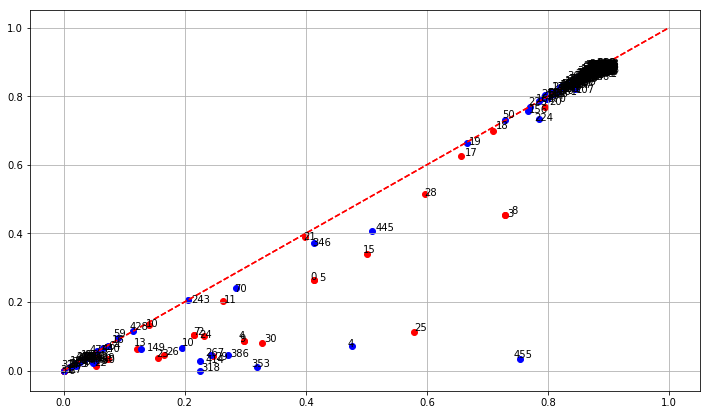

In [464]:
plt.figure(figsize=(12,7))
dt  = map(lambda x:x.get('data').get('med'),tst_out)
xs,ys = zip(*dt)
plt.scatter(*zip(*dt),color='red')
for i,(x,y) in enumerate(dt):
    x = x+(np.random.random()-0.5)/50.
    y = y+(np.random.random()-0.5)/50.
    plt.text(x,y,i )
plt.plot([0,1],[0,1],'r--')

dt  = map(lambda x:x.get('data').get('med'),out)
xs,ys = zip(*dt)
plt.scatter(*zip(*dt),color='blue')
for i,(x,y) in enumerate(dt):
    x = x+(np.random.random()-0.5)/50.
    y = y+(np.random.random()-0.5)/50.
    plt.text(x,y,i)
plt.plot([0,1],[0,1],'r--')

plt.grid()
plt.show()

In [469]:
out[445]

{'data': {'cor': [0.16066192754874656],
  'cov': [0.08686230245730861,
   0.013501685289416431,
   0.013501685289416431,
   0.08130526662676812],
  'med': [0.5086805555555556, 0.40625]},
 'rule': {'family': '2dntca', 'rulestr': '28be82eb7dce7f780e0a74a960'}}

In [452]:
out[377]

{'data': {'cor': [0.16066192754874656],
  'cov': [0.08686230245730861,
   0.013501685289416431,
   0.013501685289416431,
   0.08130526662676812],
  'med': [0.4288194444444444, 0.03472222222222221]},
 'rule': {'family': '2dntca', 'rulestr': '3dab0a2a709fbccd59890fd576'}}

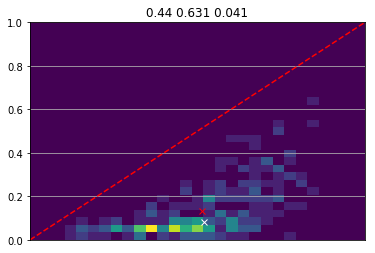

In [476]:
test2(dct=it[4])
plt.show()

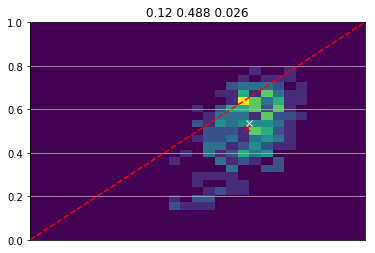

In [444]:
test2(dct=it[50])
plt.show()

In [477]:
lview(guess(dct=it[4]))

http://newflaw.com/view.php?rule_alias=b3aejnry2cen5cekn4aintw7e6acins1ce3aceinqy2ain5aenqry4acnrw7ce6acn8


'http://newflaw.com/view.php?rule_alias=b3aejnry2cen5cekn4aintw7e6acins1ce3aceinqy2ain5aenqry4acnrw7ce6acn8'

In [463]:
lview(guess(dct=tst_dct[21]))

http://newflaw.com/view.php?rule_alias=b3cejq2a5cinqr4cejnqrwz6aeik8s1c3ceinq2n5ijr4ijqty6ain8


'http://newflaw.com/view.php?rule_alias=b3cejq2a5cinqr4cejnqrwz6aeik8s1c3ceinq2n5ijr4ijqty6ain8'

In [378]:
lview(guess(dct=it[63]))

http://newflaw.com/view.php?rule_alias=b1e03eijry2aein5knqry4ceinqrty7e6ceins1c3aiknr2ik5aijknqr4aceijnrty7ce6aekn8


'http://newflaw.com/view.php?rule_alias=b1e03eijry2aein5knqry4ceinqrty7e6ceins1c3aiknr2ik5aijknqr4aceijnrty7ce6aekn8'

In [232]:
# plt.gca().
# ?np.corrcoef
# np.cov
# res.covariances_ar
def cov2cor(COV):
    D = np.diag(COV)
    COR = COV /  np.sqrt(D[:,None]*D[None,:])
    return COR


array([[1.        , 0.16066001],
       [0.16066001, 1.        ]])

In [171]:
# res = gaussfit(a)
# np.trace
# np.triu(res.covariances_)

array([[[0.08668958, 0.01347468],
        [0.        , 0.08114366]]])

In [271]:
# a.shape
res.score(a)

-0.3463116307568363

In [272]:
# res
# data = a
np.min(res.score_samples(a))
# np.exp(res.score_samples(a))

-2.422049440018989

In [168]:
import sklearn.mixture
def gaussfit(data):
    gmm = sklearn.mixture.GaussianMixture()
    res = gmm.fit(data)
    return res
#     res.bic(a)


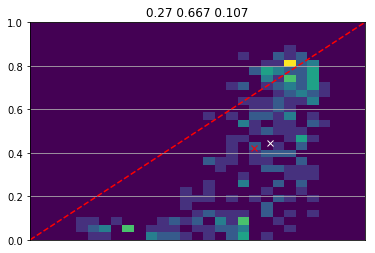

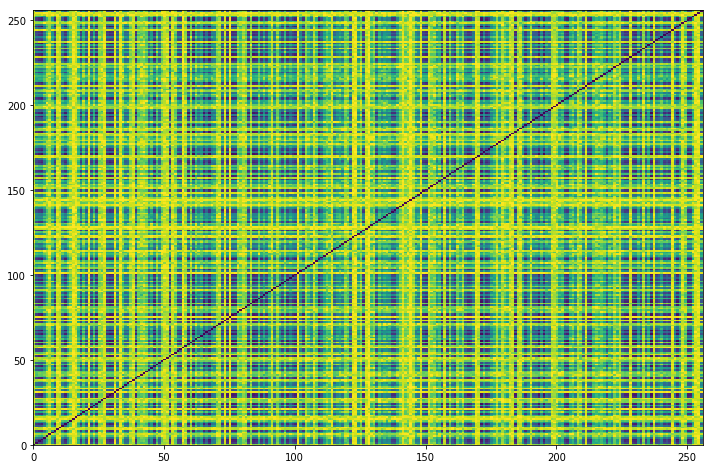

In [295]:
o1 = test2(i=8);
# plt.close()
plt.show()
plt.subplots(1,1,figsize=[12,8])
np.fill_diagonal(o1,0.)
plt.pcolormesh(o1,vmin=0,vmax=1)
e,v = np.linalg.eig(o1,)
plt.show()

In [293]:
# ?p.cov

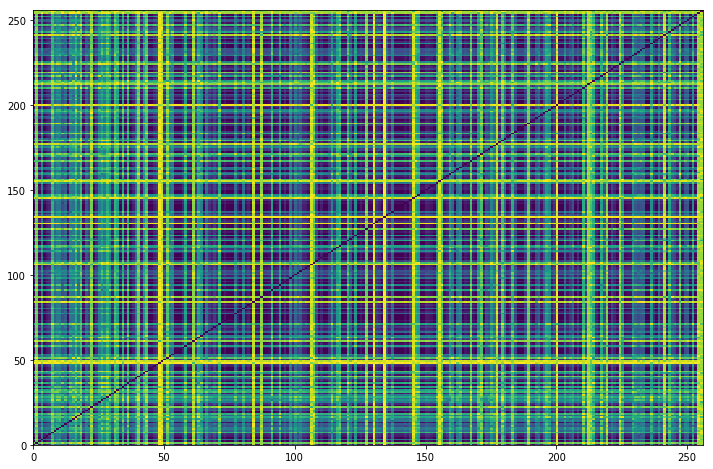

In [75]:
o1 = test2(i=15);
plt.close()
# plt.show()
plt.subplots(1,1,figsize=[12,8])
np.fill_diagonal(o1,0.)
plt.pcolormesh(o1,vmin=0,vmax=1)
e,v = np.linalg.eig(o1,)
plt.show()

32


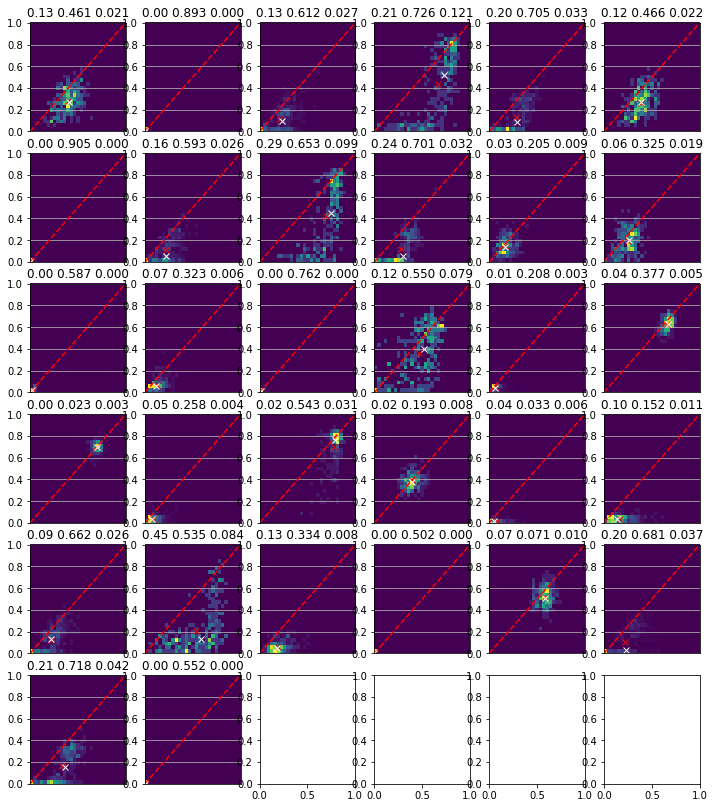

In [296]:
#### Distinguish 20 and 8
print len(tst_data)
fig,axs = plt.subplots(6,6,figsize=[12,14])
axs = axs.flat
for i in range(len(tst_data)):
    plt.sca(axs[i])
    test2(i=i)
#     plt.plot(0,0)
    plt.xlabel('')
#     plt.title('i=%d         '%i)#
#     break
plt.show()

In [285]:
# for i in 
lview(guess(i=2))

http://newflaw.com/view.php?rule_alias=b1ce03cijnq2ak5acinqr4aceijy7c6aikn8s1c03aejkn2aeikn5y4cjknqrtz6n


'http://newflaw.com/view.php?rule_alias=b1ce03cijnq2ak5acinqr4aceijy7c6aikn8s1c03aejkn2aeikn5y4cjknqrtz6n'

32


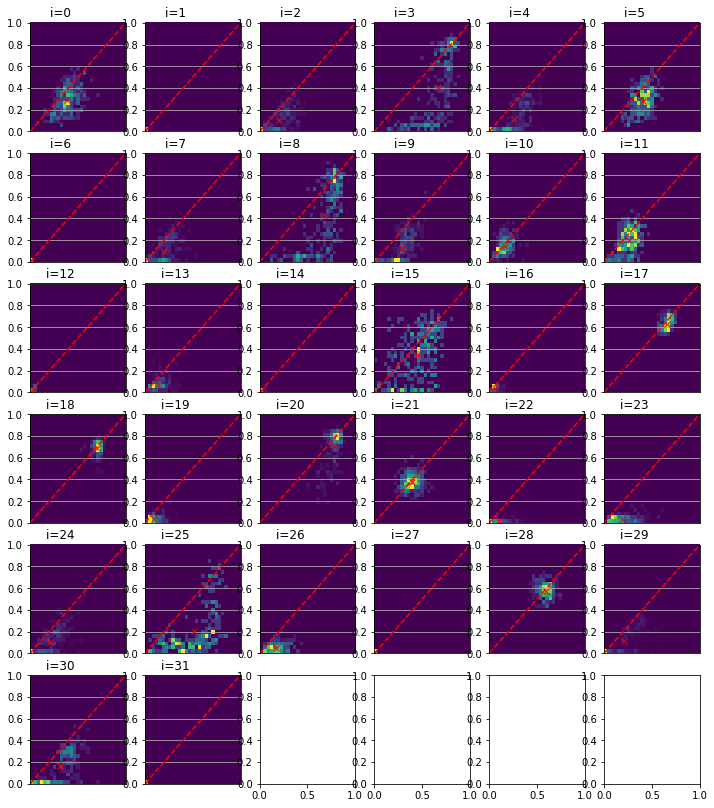

In [221]:
#### Distinguish 20 and 8
print len(tst_data)
fig,axs = plt.subplots(6,6,figsize=[12,14])
axs = axs.flat
for i in range(len(tst_data)):
    plt.sca(axs[i])
    test2(i=i)
#     plt.plot(0,0)
    plt.xlabel('')
    plt.title('i=%d         '%i)#
#     break
plt.show()

32


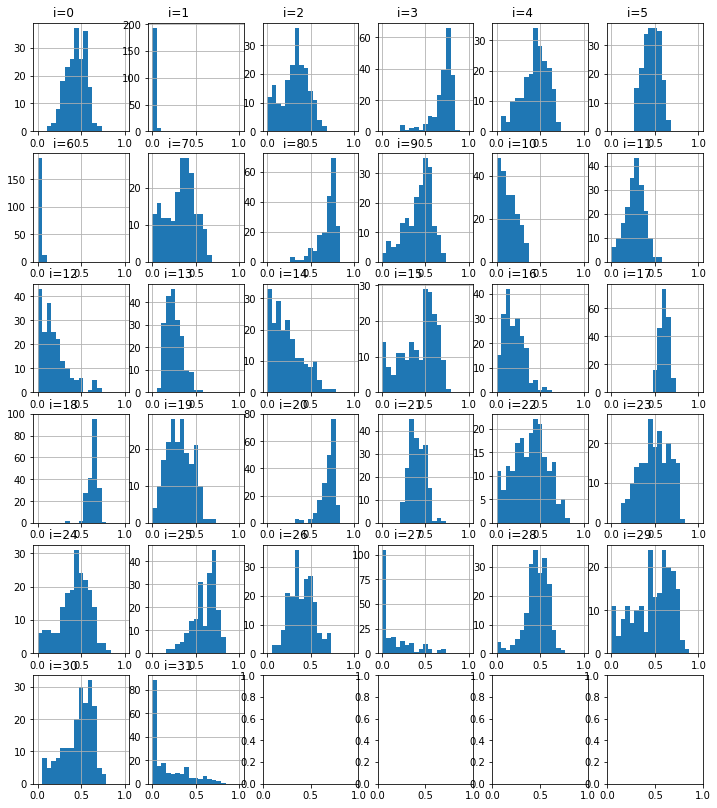

In [746]:
print len(tst_data)
fig,axs = plt.subplots(6,6,figsize=[12,14])
axs = axs.flat
for i in range(len(tst_data)):
    plt.sca(axs[i])
    test2(i=i)
#     plt.plot(0,0)
    plt.xlabel('')
    plt.title('i=%d         '%i)#
plt.show()

32


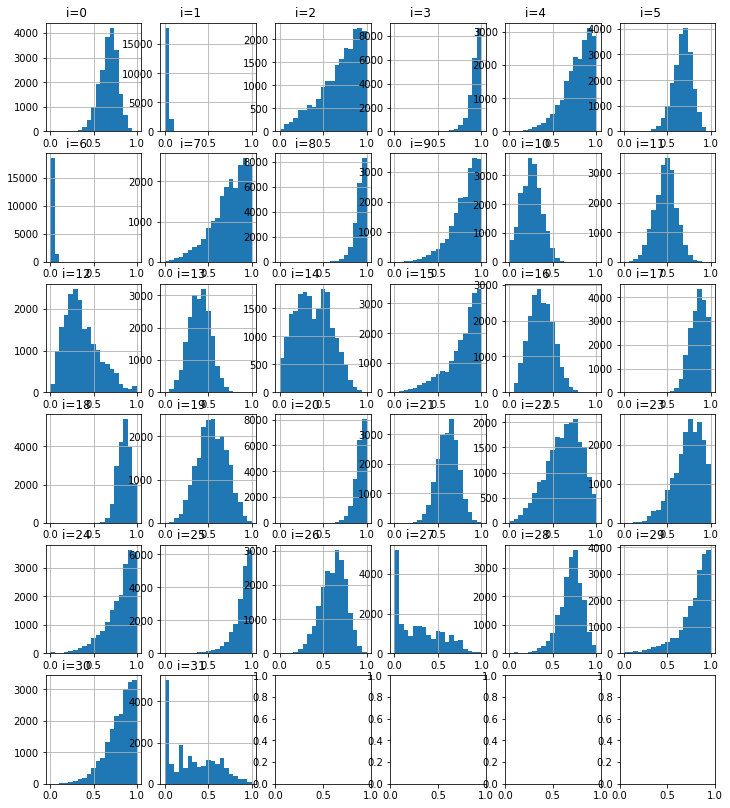

In [730]:
print len(tst_data)
fig,axs = plt.subplots(6,6,figsize=[12,14])
axs = axs.flat
for i in range(len(tst_data)):
    plt.sca(axs[i])
    test2(i=i)
#     plt.plot(0,0)
    plt.xlabel('')
    plt.title('i=%d         '%i)#
plt.show()

In [750]:
lview(guess(i=21))

http://newflaw.com/view.php?rule_alias=b3cejq2a5cinqr4cejnqrwz6aeik8s1c3ceinq2n5ijr4ijqty6ain8


'http://newflaw.com/view.php?rule_alias=b3cejq2a5cinqr4cejnqrwz6aeik8s1c3ceinq2n5ijr4ijqty6ain8'

In [618]:
# sysX.dimsiz
bin2hex = lambda bitstr:hex(int(bitstr,2)).lstrip('0x').rstrip('L')

In [620]:
sysX.rulestr = bin2hex(sysX.family.rstr(None)).zfill(26)

'254496c0a4858251bc90373332'

32


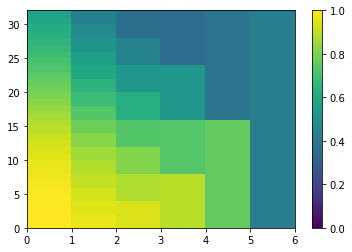

(20, 6)
20


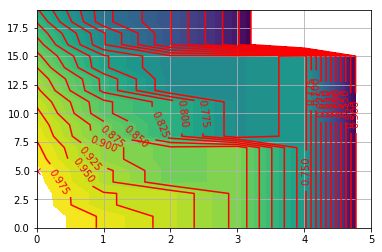

In [685]:
# 16**2
# sysX.adv = sysX.family.randadv()

# sysX.rulestr = bin2hex(sysX.family.rstr(None)).zfill(26)
sysX.rulestr2alias()
# dmet_2d(lambda x,y:o[x,y],)
# o = test(18)
o = test(sysX=sysX)
plt.show()
dmet_2d(None,Zs=o[:20,:6],levels=np.arange(0.5,1,0.0125));
plt.show()

In [686]:
# sysX.rulestr2alias()
lview(sysX)

http://newflaw.com/view.php?rule_alias=b3ceir2ikn5ijkry4nqt6aceis1e03ejnqy2aei5ijnqr4acenqrwyz7ce6acik8


'http://newflaw.com/view.php?rule_alias=b3ceir2ikn5ijkry4nqt6aceis1e03ejnqy2aei5ijnqr4acenqrwyz7ce6acik8'

In [358]:
?? KBs.CA_sys

In [7]:
# 16**2
def lview(self):
    fmt = 'http://newflaw.com/view.php?rule_alias={:}'
    uri = fmt.format(self.alias)
    print uri
    ele = '<iframe src="{}" width=600 height=500></iframe>'.format(uri)
    ipd.display(ipd.HTML(ele))
    return uri
def sample(self):
    avc=self.rdf().astype(int)
    hist = np.zeros((self.hmax,)+avc.shape,dtype=np.int)
    for i in range(self.hmax):
        hist[i]=avc
        avc=(self.adv(avc))    
    return hist

In [ ]:
def empty_counter(t):
    return {x:0 for x in range(2**t)}
def reduce_list(f, lst, init=0): 
    prev = init
    for i in lst: 
        yield prev
        prev = f(prev, i)
    yield prev
def compose(f,g):
    return lambda x:g(f(x))

import math
# import numpy as np
def entropise(ct,log=np.log2):
    if isinstance(ct,collections.Counter):
        pass
    else:
        ct = collections.Counter(ct)
    x = ct.values()
    S = sum(x)
    return log(S)-sum(x*log(x)/S)

# map(entropise,(x.ravel() for x in l[0]))
# %timeit [(x)/sum(ct) for x in ct.values()]

In [282]:
entF = make_entF(6)
import matplotlib as mpl

def main(rulestr,iframe=0):
    sysX = KBs.CA_sys('2dntca',rulestr,(200,2**6,400))
    sysX.rulestr2alias()
    fmt = 'http://newflaw.com/view.php?rule_alias={:}'
    uri = fmt.format(sysX.alias)
    print uri
    ele = '<iframe src="{}" width=600 height=500></iframe>'.format(uri)

    
    self = sysX
    avc=sysX.rdf().astype(int)
    hist = np.zeros((self.hmax,)+avc.shape,dtype=np.int)
    for i in range(self.hmax):
        hist[i]=avc
        avc=(sysX.adv(avc))

    fig,axs = plt.subplots(2,1,figsize=[12,6])
    axs = axs.flat
    plt.sca(axs[0])
    plt.pcolormesh(hist.mean(axis=1).reshape((len(hist),-1) )[2:])

    plt.sca(axs[1])
    o = entF(hist)
    o = o[1:]
    YLIM = [0.25,1]
#     plt.pcolormesh(1/o,vmin=0.02,vmax=1,norm=mpl.colors.LogNorm())
    plt.pcolormesh(o,vmin=YLIM[0],vmax=YLIM[1],norm=None)
    # plt.set_z
    plt.grid()
    plt.colorbar()
    # plt.hist(hist.flat)
    plt.show()
#     plt.sca(axs[2])
    fig,axs = plt.subplots(1,2,figsize=[12,3])
    plt.sca(axs[0])
    plt.plot(o.T,'.-');
    plt.yscale('log')
    plt.ylim(YLIM)
    plt.grid()
    
    plt.sca(axs[1])
    plt.plot(o,'.-');
    plt.yscale('log')
    plt.ylim(YLIM)
    plt.grid()
    
    plt.show()
    # plt.imshow(np.mean(avc,axis=0))
    # plt.show()
    if iframe:
        ipd.display(ipd.HTML(ele))
    return o

http://newflaw.com/view.php?rule_alias=b1e03aeiknry2ceikn5acq4aejqrtwz7c6aekns1ce03aij2cei5ijkny4ajt6ik8
64


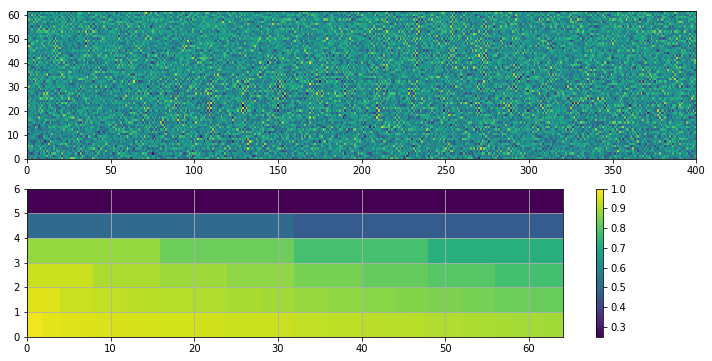

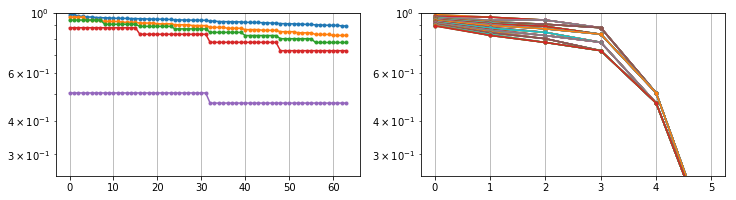

In [283]:
# np.array([[[[0,]]],[[[2]]]]).shape
# np.max(o)

i = 8
main(tst_data[i][1]);

http://newflaw.com/view.php?rule_alias=b1ce3eijkr2e5cn4ejqrtwz7e6aikns1c03aejkr2in5ckq4ejkqtyz6ceikn
64


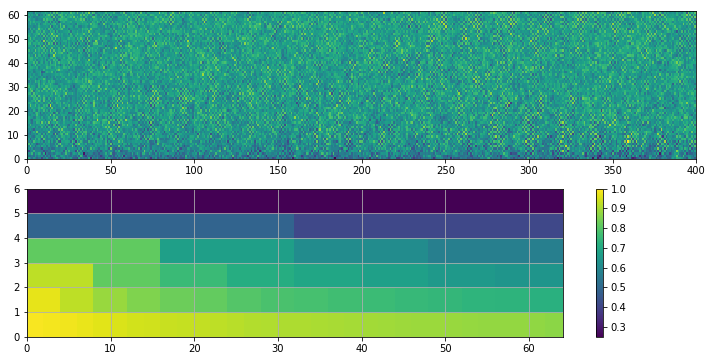

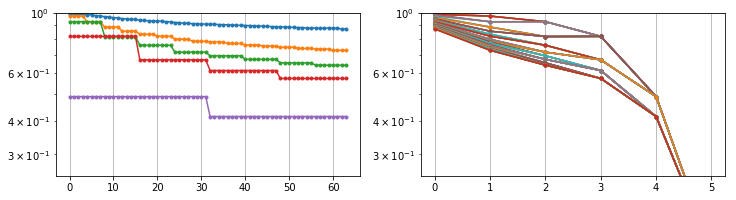

In [284]:
# np.array([[[[0,]]],[[[2]]]]).shape
# np.max(o)

i = 15
main(tst_data[i][1]);

http://newflaw.com/view.php?rule_alias=b3cijq2a5iqr4cijknrz6in8s3ejny2cn5ekr4ajnty6ac8
64


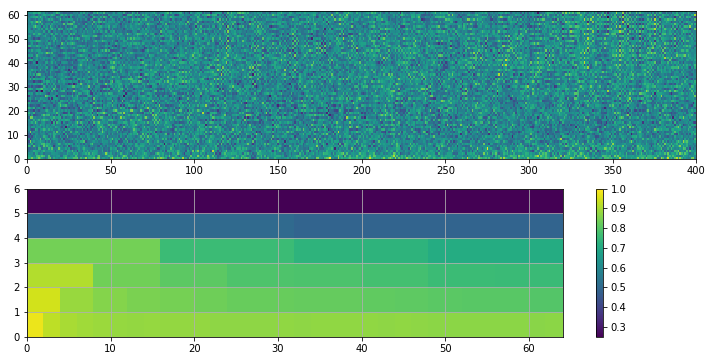

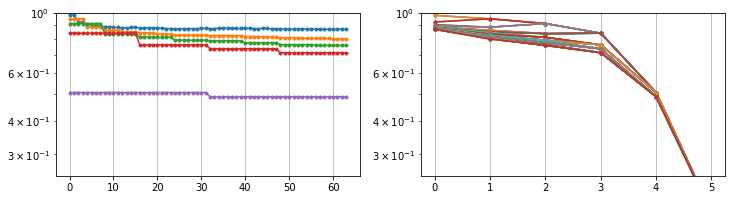

In [285]:
# np.array([[[[0,]]],[[[2]]]]).shape
# np.max(o)

i = 18
o = main(tst_data[i][1]);


http://newflaw.com/view.php?rule_alias=b3akqr2cn5eijnqr4ceijkqryz7c6acekns1c3ek2ak5akqy4aejknwy7c6aek
64


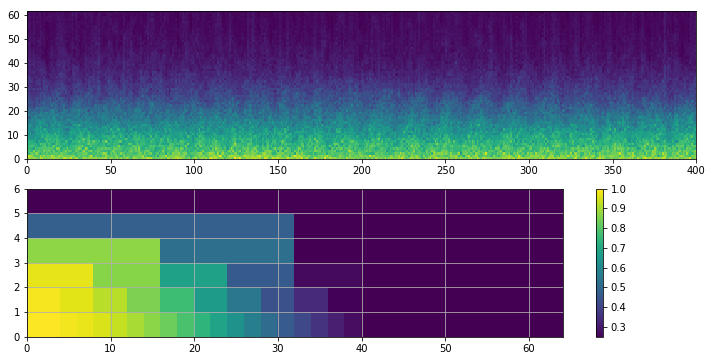

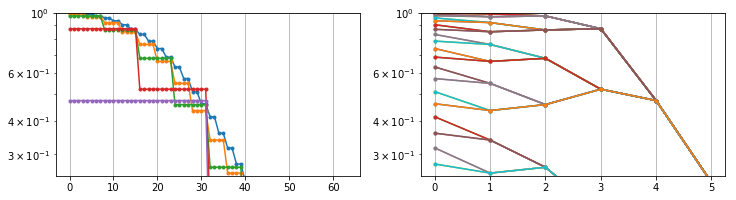

In [286]:
# np.array([[[[0,]]],[[[2]]]]).shape
# np.max(o)

i = 12
o = main(tst_data[i][1]);


http://newflaw.com/view.php?rule_alias=b3cijq2a5iqr4cijknrz6in8s3ejny2cn5ekr4ajnty6ac8
64


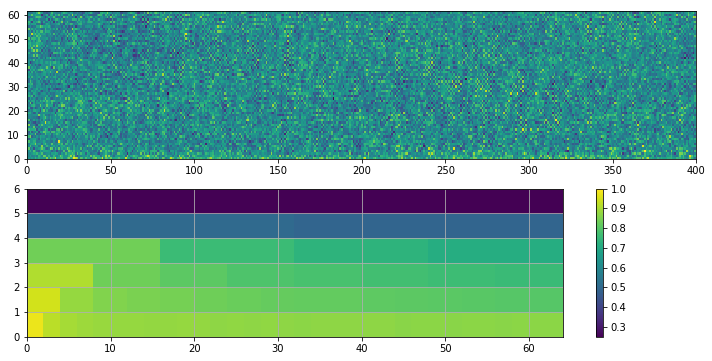

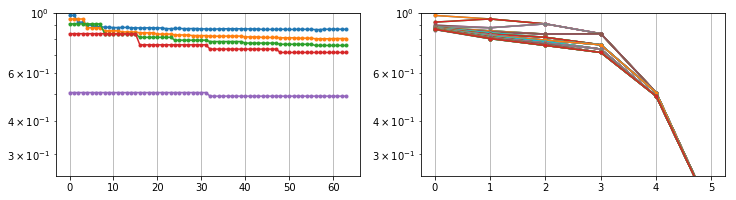

In [287]:
##### Undetected
i = 18
o = main(tst_data[i][1]);


In [68]:
import scipy.ndimage
scipy.ndimage.filters.convolve

In [23]:
# np.log2
math.log(2)

0.6931471805599453

In [333]:
np.vstack??

32


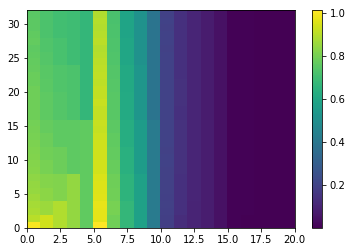

(32, 4, 5)

In [510]:
lim  = 4
# def make_entF(lim,tlim=4):
# #     lst = [[2**i,1] for i in range(1,lim+1)]
#     # lst = [[1,2],[1,4],[1,8]]
# #     x = lst[0]
entropise_vct = np.vectorize(entropise)
def entF_base(hist,tlim=4,slim=0):
    lst = [[2**(2**i),1] for i in range(0,tlim)]
#         L = len(lst) + 1
#         L = len(lst)
    assert len(hist)>=(2**tlim), 'Time span too short:%d<%d '%(len(hist),(2**L))
#         print (len(hist)%(2**L))
    arr = hist[:len(hist)//(2**tlim)*(2**tlim)]
#     arr = hist[:len(hist)//(2**tlim)*(2**tlim)]
#         print(len(hist)%(2**L)*2**L)
    print(len(arr))
    def f(hist,fir,reshape=1):
        if reshape:
            fir = np.reshape(fir,(2,1,1,1))
        o = KBs.convolve_int(hist,fir,'constant',)
        return np.take(o,range(0,len(o),2),axis=0)
#     l = list(reduce_list(f,lst,arr))
#     out = map(lambda stack:map(entropise,(x.ravel() for x in stack)), l)
#     out = np.vstack(map(lambda i:np.repeat(out[i],2**i,axis=0)/2**i,range(len(out))))

    l = arr
    
    lim = tlim
    lst = [[2**(2**i),1] for i in range(0,lim)]
    # print lst
    l = list(reduce_list(f,lst,l))

    lim = slim
#     lst = [ [2**(4**i*j) for j in range(4)][::-1] for i in range(0,lim)]
    lst = [ [2**(4**i*1) for j in range(4)][::-1] for i in range(0,lim)]
    l = map(lambda x:list(reduce_list(g,lst,x)),l)
    
    l2 = l
    
#     out = map(lambda l: 
#         map(
#         lambda (i,stack):
#             np.repeat(
#                 map(entropise,(x.ravel() for x in stack)),
#                 2**i,
#                 axis=0)/2**i,
#             enumerate(l) ),
#        l2,)
    out = l2
    out = map(lambda (ti,l): 
              map(lambda (si,stack):
#                   np.repeat(
#                       np.repeat(
                          np.repeat(map(entropise,[x.ravel() for x in stack])
                                    ,2**ti,axis=0)/2**ti/2**(si**2),
#                           2**si,axis=2)/2**si,
#                       2**si,axis=3)/2**si,
                  enumerate(l)) ,
                  enumerate(l2)
             )
    
#     out = map(lambda l: 
#         map(
#         lambda (i,stack):            
#             map(lambda val:
#                 np.repeat(
#                     entropise(val),
#                     2**i,
#                     axis=0)/2**i,
#                 (x.ravel() for x in stack)),
#             enumerate(l) ),
#        l2,)

# #     srepF = lambda ax: lambda lst: np.concatenate(
# #         map(lambda j: np.repeat(out[i][j],2**j,axis=ax)/2**j,lst)
# #         ,axis= ax)
#     out = np.vstack(
#         map(
#             lambda i:np.repeat(
#                 srepF(3)srepF(2)( range(len(out[i])) )
#                 map( srepF,range(len(out[i])))
#                 ,2**i,axis=0)/2**i,range(len(out))
#         )
#     )

        
#     out = map(lambda stack:map(entropise,(x.ravel() for x in stack)), l)

#     out = entropise_vct(np.array([[x.ravel() for x in y ]for y in l2]))
    out = np.array(out)
    out = np.moveaxis(out,2,0)
    out = np.moveaxis(out,2,1)
    return out 
entF = functools.partial(entF_base,tlim=4,slim=3)
#     return scorer
# entF = make_entF(4)
o = entF(hist)

# plt.imshow(o[:,:,0])
# plt.imshow(o[:,0,:])
plt.pcolormesh(o.reshape((len(o),-1)))
plt.colorbar()
plt.show()
o.shape


32


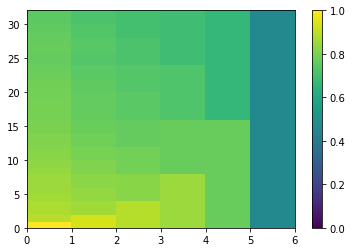

In [651]:
# i = 4
# i = 0  ## life1
i = 5  ## life2
# i = 8  ## unwanted
# i = 10 ## replicator
# i = 12
# i = 14
# i = 15
# i = 18 ## undetected
# i = 1
entF = functools.partial(entF_base,tlim=5,slim=0)

def test(i=None,sysX=None):
    dimsiz = (200,2**5,16**2)
    if sysX is None:
        sysX = KBs.CA_sys('2dntca',tst_data[i][1],dimsiz)
        # sysX = KBs.CA_sys('2dntca',tst_data[i][1],(200,2**7,400))
        sysX.rulestr2alias()
    else:
        sysX.dimsiz = dimsiz
        sysX.change_size()
    hist = sample(sysX)

    o = entF(hist)
    # plt.imshow(o[:,:,0])
    # plt.imshow(o[:,0,:])
    oo = (o.reshape((len(o),-1)))
    plt.pcolormesh(oo,vmin=0,vmax=1.0)
    plt.colorbar()
    plt.show()
    return oo
o = test(5)

In [553]:
def dmet_2d(f,Zs= None,asp=1.,bins = 10,span=[-2,2],N = 1000, check_ph = 1,levels = None,log = 0,silent = 0,**kwargs):
    '''
    Plot a real-valued function on a 2D plane
    '''
    origin = 'lower'
    Nx = int(np.sqrt(N))
    Ny = Nx
    spany = [x*asp for x in span]
    X = np.linspace(*(span+[Nx]))
    Y = np.linspace(*(spany+[Ny]))
    if Zs is None:
        f = np.vectorize_lazy(f)
    #     print Xs.shape
    #     Zs = map(f,zip(Xs,Ys))
        Zs = f(Xs,Ys)
    else:
        X = range(Zs.shape[0])
        Y = range(Zs.shape[1])
    Xs,Ys = np.meshgrid(X,Y)
    if check_ph:
#         print len(Zs)
#         print Zs[0]
#         return Zs
        Zs = map_ph(Zs)
#         print Zs[0]
        Zs = np.array(Zs)
    if log:
        Zs = np.log(1+Zs)
    if silent:
        return Zs,Xs,Ys
#     print len(Zs)
#     print Zs[0]
#     print len(X)
    imin = np.argmin(Zs)
    print Zs.shape
    print len(X)
    plt.plot(Xs.flat[imin],Ys.flat[imin],'rx')
    CS = plt.contourf(Zs,levels = levels,**kwargs)
#     CS = plt.contourf(X,Y,Zs,levels = levels,**kwargs)
    CS2 = plt.contour(CS, levels=CS.levels[::2],
                  colors='r',
#                   origin=origin
                     )
#     Cs = plt.contour(X,Y,Zs)
    plt.clabel(CS2, inline=1, fontsize=10)
    plt.grid()
    return Zs,Xs,Ys

64


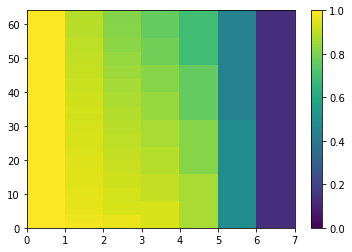

(20, 6)
20


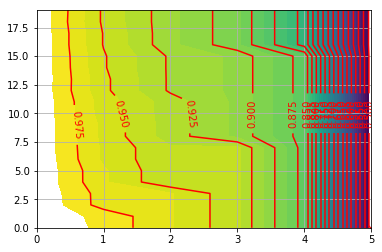

In [589]:
# dmet_2d(lambda x,y:o[x,y],)
# o = test(18)
o = test(8)
plt.show()
dmet_2d(None,Zs=o[:20,:6],levels=np.arange(0.5,1,0.0125));
plt.show()

64


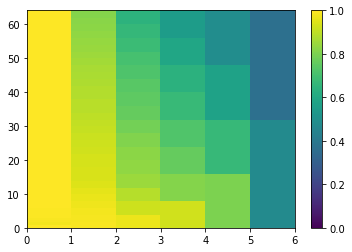

(20, 6)
20


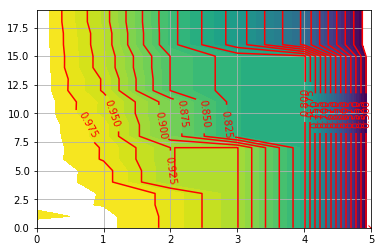

In [587]:
# dmet_2d(lambda x,y:o[x,y],)
# o = test(18)
o = test(15)
plt.show()
dmet_2d(None,Zs=o[:20,:6],levels=np.arange(0.5,1,0.0125));
plt.show()

64


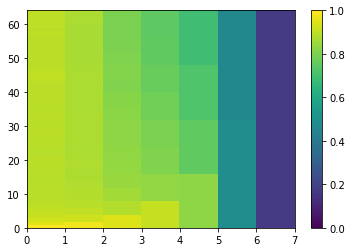

(20, 6)
20


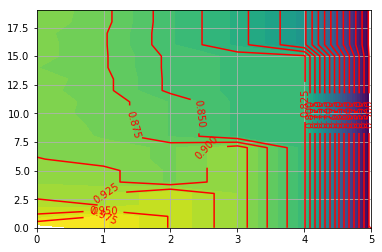

In [590]:
# dmet_2d(lambda x,y:o[x,y],)
# o = test(18)
o = test(18)
plt.show()
dmet_2d(None,Zs=o[:20,:6],levels=np.arange(0.5,1,0.0125));
plt.show()

64


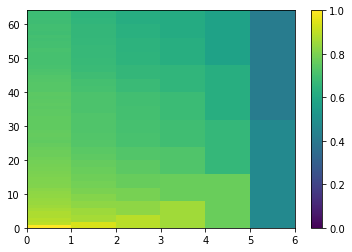

(20, 6)
20


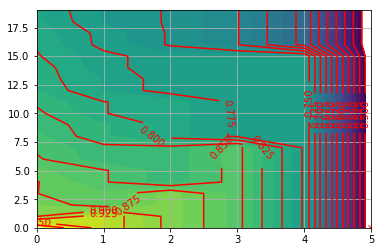

In [586]:
# dmet_2d(lambda x,y:o[x,y],)
# o = test(18)
o = test(5)
plt.show()
dmet_2d(None,Zs=o[:20,:6],levels=np.arange(0.5,1,0.0125));
plt.show()

32


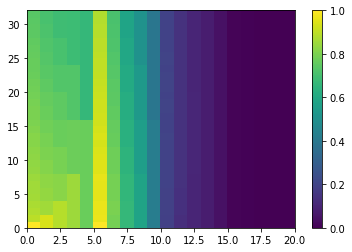

32


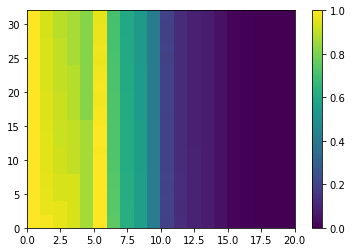

32


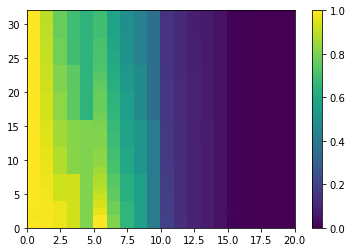

32


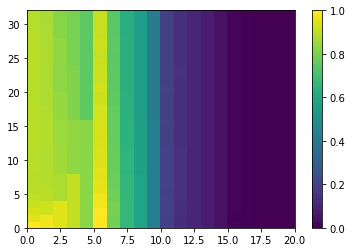

In [531]:
test(5)
test(8)
test(15)
test(18)

In [412]:
# o[1][2]
o[0].shape
# o.shape
o.size
o.flat[2]

[array([1.88045672]),
 array([1.71806742]),
 array([1.69041682]),
 array([1.66223778]),
 array([1.64562774]),
 array([1.61313903]),
 array([1.59319177]),
 array([1.58456419]),
 array([1.55286532]),
 array([1.5363653]),
 array([1.52389696]),
 array([1.51675847]),
 array([1.48938006]),
 array([1.46239488]),
 array([1.45223399]),
 array([1.44337953])]

In [247]:
# arr.shape
from IPython.core.debugger import Tracer; Tracer()()

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  


--Call--
> /home/shouldsee/.local/lib/python2.7/site-packages/IPython/core/displayhook.py(236)__call__()
    234         sys.stdout.flush()
    235 
--> 236     def __call__(self, result=None):
    237         """Printing with history cache management.
    238 

ipdb> e
*** NameError: name 'e' is not defined
ipdb> q
Exiting Debugger.


In [301]:
lim = 3
hist = np.reshape(range(16),(1,-1,4,4))
hist = np.repeat(hist,4,axis = 0)

L = len(lst)
arr = hist[:len(hist)//(2**L)*(2**L)]
arr = np.array(arr)
def f(hist,fir,reshape=1):
    if reshape:
        fir = np.reshape(fir,(2,1,1,1))
#     o = scipy.ndimage.filters(hist,fir)
    o = KBs.convolve_int(hist,fir,'constant',)
#     o = KBs.convolve_int(hist,fir,'wrap')
#     return o
    return np.take(o,range(0,len(o),2),axis=0)

def g(hist,fir,reshape=1):
    if reshape:
        fir = np.reshape(fir,(1,1,2,2))
#         print fir.shape
#         print hist.shape
#     o = scipy.ndimage.filters(hist,fir)
    o = KBs.convolve_int(hist,fir,'constant',)
#     o = KBs.convolve_int(hist,fir,'wrap')
#     return o
    ot = np.take(o,range(0,o.shape[2],2),axis=2)
    ot2 = np.take(ot,range(0,ot.shape[3],2),axis=3)
    return ot2

    

# l = list(reduce_list(f,lst,arr))

# lim = tlim
lim = 3
lst = [[2**(2**i),1] for i in range(0,lim)]
# print lst
l = list(reduce_list(f,lst,arr))

# lim = slim
lim = 2
lst = [ [2**(4**i*j) for j in range(4)][::-1] for i in range(0,lim)]
l2 = map(lambda x:list(reduce_list(g,lst,x)),l)

ent = np.vectorize(entropise)(np.array([[x.ravel() for x in y ]for y in l2]))

# map(map(lambda x:))
# print l[0][0]
# print l[1][0]
# print l[2][0]
# l[0]
# out = map(lambda stack4:map(entropise,(x.ravel() for x in stack)), l)
# l.insert(0,arr)
# l

[[2, 1], [4, 1], [16, 1]]


In [315]:
np.vectorize(entropise)(np.array([[x.ravel() for x in y ]for y in l2]))

array([[4., 2., 0.],
       [4., 2., 0.],
       [4., 2., 0.],
       [4., 2., 0.]])

In [309]:
np.repeat(np.repeat([[1]],2,axis = 0),2,axis=1)

array([[1, 1],
       [1, 1]])

In [255]:
np.reshape(range(4),(1,1,2,2))

array([[[[0, 1],
         [2, 3]]]])

In [274]:
sum(([58,88,178,208] * np.array([4096, 256, 16, 1][::-1])))

899002

In [259]:
sum(([2,3,6,7] * np.array([1,2,4,8])))

88

In [225]:
2**16

65536

In [231]:
# 15*(np.power(2,[1,2,3]).sum()*2**4+1)
np.power(2,[0,4,8,12]).sum()*15

65535

array([[0.11069608, 0.20740221, 0.22978956, 0.28569894, 0.23840876,
        0.32886591, 0.39138398, 0.2405091 ],
       [0.32309386, 0.32309386, 0.35888907, 0.35888907, 0.59971108,
        0.59971108, 0.2405091 , 0.2405091 ],
       [0.68926821, 0.68926821, 0.68926821, 0.68926821, 0.2405091 ,
        0.2405091 , 0.2405091 , 0.2405091 ]])

In [127]:
# mapper_2d()
# ?mapper_2d

In [95]:
ct = empty_counter(0)
ct.update(collections.Counter(hist.ravel()))

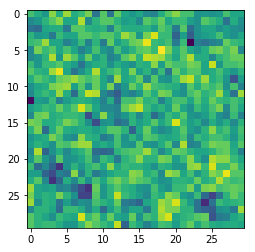

In [25]:
plt.imshow(hist.mean(axis=(0,1) ))
plt.show()

In [19]:
# ??np.place
# ??np.put